In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_iris
import pickle
from sklearn.preprocessing import StandardScaler

In [2]:
df=pd.read_csv('StressLevelDataset.csv')

In [3]:
ok=df.corr()
ok=ok['stress_level']
ok=ok.abs()
ok=ok.sort_values(ascending=False)
ok=ok.head(11)

In [4]:
lis=[
'self_esteem',
'bullying',
'sleep_quality',
'future_career_concerns',
'anxiety_level',
'depression',
'academic_performance',
'headache',
'safety',
'basic_needs','stress_level']

df=df[lis]

In [5]:
df

,self_esteem,bullying,sleep_quality,future_career_concerns,anxiety_level,depression,academic_performance,headache,safety,basic_needs,stress_level
0,20,2,2,3,14,11,3,2,3,2,1
1,8,5,1,5,15,15,1,5,2,2,2
2,18,2,2,2,12,14,2,2,3,2,1
3,12,5,1,4,16,15,2,4,2,2,2
4,28,5,5,2,16,7,4,2,4,3,1
...,...,...,...,...,...,...,...,...,...,...,...
1095,17,3,3,3,11,14,2,3,2,3,1
1096,12,3,0,1,9,8,0,0,3,4,2
1097,26,1,5,1,4,3,5,1,4,4,0
1098,0,4,1,4,21,19,2,5,1,1,2


<Axes: xlabel='stress_level', ylabel='self_esteem'>

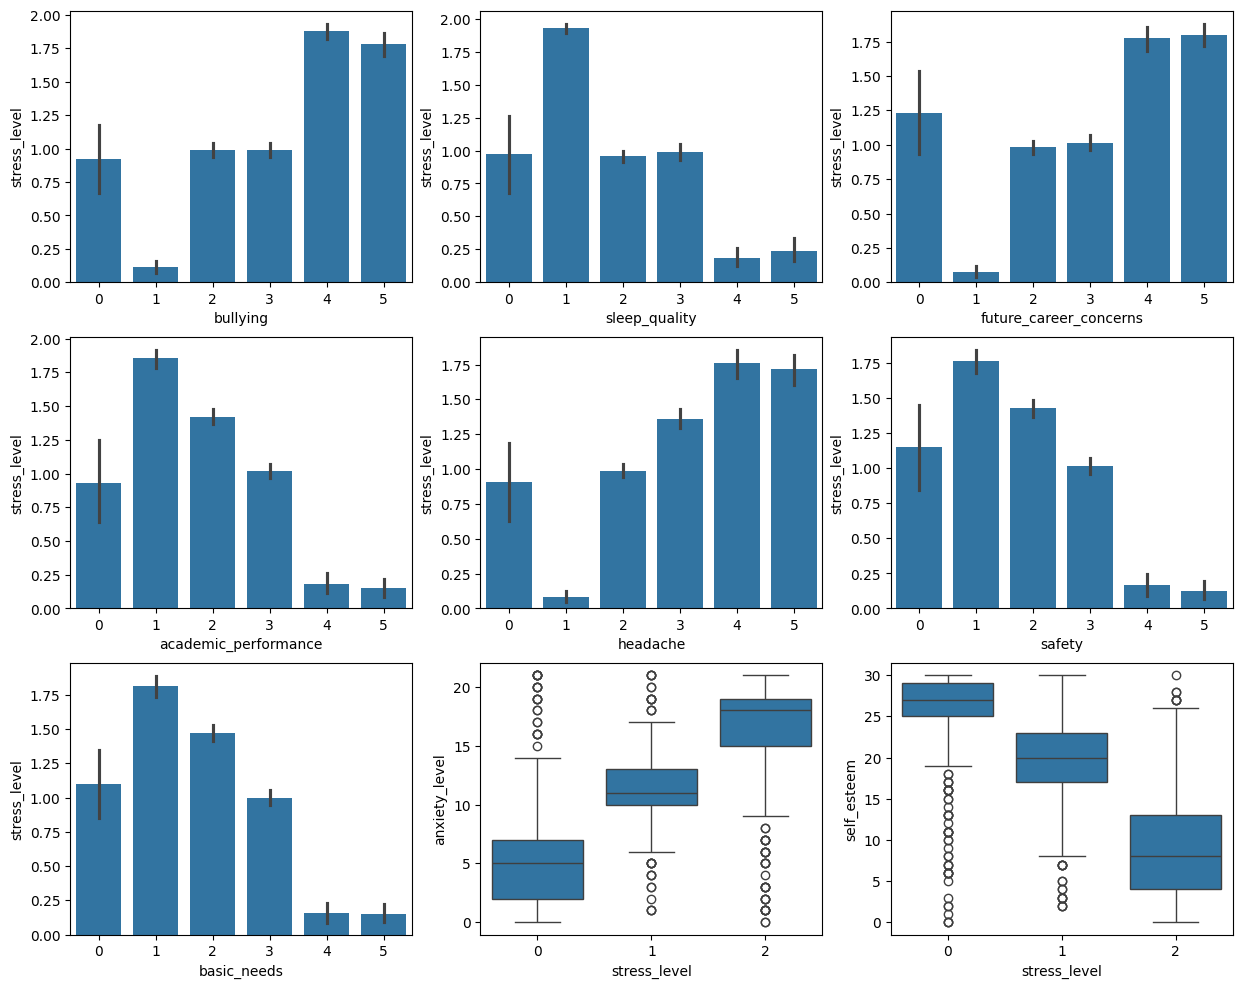

In [6]:
fig, axes = plt.subplots(3, 3, figsize=(15, 12))  # 3x3 grid

sns.barplot(x='bullying',y='stress_level',data=df,ax=axes[0,0])
sns.barplot(x='sleep_quality',y='stress_level',data=df,ax=axes[0,1])
sns.barplot(x='future_career_concerns',y='stress_level',data=df,ax=axes[0,2])
sns.barplot(x='academic_performance',y='stress_level',data=df,ax=axes[1,0])
sns.barplot(x='headache',y='stress_level',data=df,ax=axes[1,1])
sns.barplot(x='safety',y='stress_level',data=df,ax=axes[1,2])
sns.barplot(x='basic_needs',y='stress_level',data=df,ax=axes[2,0])
sns.boxplot(y='anxiety_level',x='stress_level',data=df,ax=axes[2,1])
sns.boxplot(y='self_esteem',x='stress_level',data=df,ax=axes[2,2])

In [7]:
lis=[
'self_esteem','bullying','sleep_quality','future_career_concerns','anxiety_level','depression','academic_performance','headache','safety','basic_needs']
x_input=df[lis]
y_input=df['stress_level']

In [8]:
x_train=x_input.to_numpy()
y_train=y_input.to_numpy()

In [9]:
def std_mu(x):
    mu = x_train.mean(axis=0)
    std = x_train.std(axis=0)
    std[std==0]=1.
    return mu,std
def normalize(x,mu,std):
    return (x-mu)/std

In [10]:
mu,std=std_mu(x_train)
x_train_norm=normalize(x_train,mu,std)

In [11]:
model = LogisticRegression(multi_class="multinomial", solver="lbfgs", max_iter=1000)

In [12]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(x_train)
with open("scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)

In [13]:
model.fit(x_train_norm, y_train)

c:\Users\kamal\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'multinomial'


In [14]:
x_input=np.array([8,5,1,5,15,15,1,5,2,2]).reshape(1,-1)
x_input_norm=normalize(x_input,mu,std)
preds = model.predict(x_input_norm)

In [15]:
with open("model.pkl", "wb") as f:
    pickle.dump(model, f)